<a href="https://colab.research.google.com/github/Cordero27/Minor-Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2002%20-%20Scrub/%20Entrega_03_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [151]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [152]:
#Librerias a utilizar
import pandas as pd

#Fuente del dataset: https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
#Afortunadamente también podemos usar la función de extración de datos para archivos .csv
#Como este archivo no posee cabeceras, las incorporamos a la hora de leerlo con el parámetro names.
#Además, como el archivo con los datos posee filas de datos incompletas, recurrimos a ignorarlas para evitar alterar las estadisticas del conjunto con datos externos.
data = pd.read_csv('https://raw.githubusercontent.com/Cordero27/Minor-Machine-Learning/main/WISDM_ar_v1.1_raw.txt', on_bad_lines='skip',
                   names=["user","activity","timestamp","x-acceleration","y-accel","z-accel"])

#Observamos el contenido adquirido del archivo .txt
data.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [153]:
#Verificamos si existen NAs dentro del conjunto de datos.
data.info()

#Como en la columna z-accel tiene un valor null, debemos equilibrar el resto de columnas.
dataWONA = data.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098204 non-null  int64  
 1   activity        1098204 non-null  object 
 2   timestamp       1098204 non-null  int64  
 3   x-acceleration  1098204 non-null  float64
 4   y-accel         1098204 non-null  float64
 5   z-accel         1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 50.3+ MB


Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [154]:
#Este paso fue ejecutado anteriormente. Especificamente al cargar el archivo con el dataset.

Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [155]:
dataWONA.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


Buscar datos nulos y eliminarlos si es que existen

In [156]:
#Este paso fue ejecutado al inicio de la etapa 2
#Pero limpiaremos las filas que tengan un mal formato de los datos

#Notamos que en la columna z-accel el caracter ';' esta presente al final de cada numero, por lo cual debemos quitarlo
dataWONA['z-accel'] = dataWONA['z-accel'].str.rstrip(';')
dataWONA.head()


<ipython-input-156-483c05663238>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel'] = dataWONA['z-accel'].str.rstrip(';')


,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [157]:
#Como desde un inicio, la columna z-accel tenia el caracter ';', el sistema consideró la fila con tipo object, por lo tanto debemos pasarla a tipo float
#dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
#NOS ENCONTRAMOS CON UN ERROR!!, pero nos permite conocer que la fila z-accel aun no está limpia
#(ESTA COMENTADA LA LINEA DE CÓDIGO PARA EVITAR QUE LA EJECUCIÓN AUTOMÁTICA DE CELDAS SE CANCELE PRODUCTO DE ESTE ERROR)

In [158]:
#Con el error anterior, sabemos que existen ';' entre los numeros de la columna, entonces reemplazamos el ";"" por "".
import re
dataWONA['z-accel']=dataWONA['z-accel'].str.replace(";","")

<ipython-input-158-9f8710d80932>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel']=dataWONA['z-accel'].str.replace(";","")


Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [159]:
dataWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098203 non-null  int64  
 1   activity        1098203 non-null  object 
 2   timestamp       1098203 non-null  int64  
 3   x-acceleration  1098203 non-null  float64
 4   y-accel         1098203 non-null  float64
 5   z-accel         1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [160]:
#Finalmente, ya podemos cambiar el tipado de la columna, y aprovechamos de pasar la otra columna tipo object (activity) por category
dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
dataWONA.loc[:, ("activity")] = pd.Categorical(dataWONA.loc[:, ("activity")])
dataWONA

<ipython-input-160-f329989eebb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWONA['z-accel'] = dataWONA['z-accel'].astype(str).astype(float)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [161]:
dataWONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   user            1098203 non-null  int64   
 1   activity        1098203 non-null  category
 2   timestamp       1098203 non-null  int64   
 3   x-acceleration  1098203 non-null  float64 
 4   y-accel         1098203 non-null  float64 
 5   z-accel         1098203 non-null  float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 51.3 MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [162]:
#Eliminamos la columna user y time, ya que no es relevante en este caso de estudio.
dataWONA = dataWONA.drop(dataWONA.columns[[0]], axis=1)
dataWONA = dataWONA.drop(dataWONA.columns[[1]], axis=1)

Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [163]:
dataWONA.value_counts()

activity    x-acceleration  y-accel  z-accel  
Jogging     -0.00           0.00     -0.000000    11842
Walking     -0.00           0.00     -0.000000      491
Upstairs    -0.00           0.00     -0.000000      271
Downstairs  -0.00           0.00     -0.000000      233
Sitting      5.48           2.56      8.240000      153
                                                  ...  
Jogging      6.28           1.99     -3.214402        1
                                      1.184970        1
                            2.11     -3.677494        1
                            2.18     -6.550000        1
Walking      19.91          19.23    -4.290000        1
Length: 979745, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [164]:
#Obtenemos una muestra aleatoria de tamaño igual a la cantidad de menor de instancias
sampleData = dataWONA.sample(n = 3555)
sampleData

,activity,x-acceleration,y-accel,z-accel
615835,Sitting,6.43,-1.61,3.410000
605116,Jogging,-11.60,-18.58,11.180000
908687,Downstairs,-3.57,13.87,-2.640000
582181,Sitting,-5.79,2.22,8.160000
215727,Downstairs,2.83,9.96,2.764931
...,...,...,...,...
811221,Walking,-1.50,4.52,-1.460000
258943,Jogging,-5.43,2.87,6.782933
806328,Walking,-0.61,7.59,-1.380000
375153,Walking,1.31,16.55,-0.081722


Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [165]:
sampleData.shape

(3555, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [166]:
sampleData.value_counts()

activity  x-acceleration  y-accel  z-accel  
Jogging    0.00           0.00     -0.000000    37
Sitting    5.56           1.76      8.390000     2
Standing   2.49           9.34      2.830000     2
Walking   -8.05           10.61    -0.310000     2
          -3.49           7.01      2.140000     1
                                                ..
Jogging    6.40           3.06     -1.225831     1
                          8.62      7.120000     1
                          11.69     1.180000     1
           6.44           7.93      0.926184     1
Walking    19.70          8.43      0.690000     1
Length: 3516, dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [167]:
sampleData.head()

,activity,x-acceleration,y-accel,z-accel
615835,Sitting,6.43,-1.61,3.410000
605116,Jogging,-11.60,-18.58,11.180000
908687,Downstairs,-3.57,13.87,-2.640000
582181,Sitting,-5.79,2.22,8.160000
215727,Downstairs,2.83,9.96,2.764931


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [168]:
from sklearn.model_selection import train_test_split
#Una vez normalizado podemos dividir el dataset en 2.
#Primero, dividimos del dataset en columnas independientes y dependientes ("operadoras" y "resultado").
X = sampleData.iloc[:, 1:4]
y = sampleData.iloc[:, 0]

Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [169]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X = ss.fit_transform(X)

Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [170]:
df = pd.DataFrame(X)
df["activity"] = y.tolist()
df.columns =['x', 'y', 'z', 'activity']
df

,x,y,z,activity
0,0.843855,-1.374090,0.650412,Sitting
1,-1.769110,-3.937716,2.294582,Jogging
2,-0.605377,0.964444,-0.629797,Downstairs
3,-0.927106,-0.795499,1.655535,Sitting
4,0.322132,0.373768,0.513913,Downstairs
...,...,...,...,...
3550,-0.305386,-0.448043,-0.380103,Walking
3551,-0.874934,-0.697305,1.364141,Jogging
3552,-0.176404,0.015737,-0.363175,Walking
3553,0.101849,1.369307,-0.088453,Walking


### OBTAIN

In [171]:
#Obtenemos las estadisticas correspondientes a cada columna
df.describe()

,x,y,z
count,3.555000e+03,3.555000e+03,3.555000e+03
mean,-4.996784e-18,1.529016e-16,4.996784e-19
std,1.000141e+00,1.000141e+00,1.000141e+00
min,-2.929944e+00,-4.093316e+00,-4.019706e+00
25%,-5.314657e-01,-6.157282e-01,-5.726509e-01
50%,-4.452377e-02,9.580270e-02,-7.116009e-02
75%,5.583567e-01,6.411586e-01,4.791697e-01
max,2.803217e+00,1.896535e+00,4.038206e+00


Graficamos en un histograma la cantidad de instancias por actividad en el dataset. 
Veremos que la gran mayoria pertenecen a actividades como Walking y Jogging.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


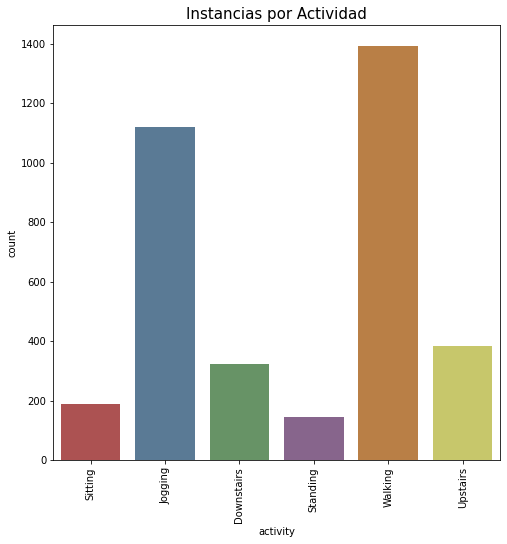

In [172]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(df.activity)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

Para ver cómo se comportan los datos en cada eje (x, y, z) los graficamos en un histograma, de manera de evidenciar que tan sesgados son los datos despues de su normalización.
Curiosamente veremos que en la columna Y existen algunos valores sesgados, pero que gracias a la normalización efectuada no son tan distantes del centro de la "campana".

(array([ 83.,  87., 156., 433., 986., 864., 504., 246., 105.,  91.]),
 array([-2.92994442, -2.3566283 , -1.78331217, -1.20999604, -0.63667992,
        -0.06336379,  0.50995234,  1.08326847,  1.65658459,  2.22990072,
         2.80321685]),
 <a list of 10 Patch objects>)

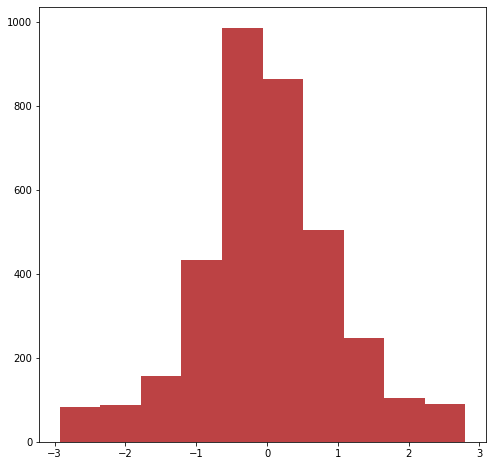

In [173]:
#Graficamos la columna X
plt.hist(df.x)

(array([ 11.,  17.,  39., 111., 323., 521., 760., 938., 474., 361.]),
 array([-4.09331629, -3.4943312 , -2.8953461 , -2.296361  , -1.6973759 ,
        -1.0983908 , -0.4994057 ,  0.0995794 ,  0.6985645 ,  1.2975496 ,
         1.8965347 ]),
 <a list of 10 Patch objects>)

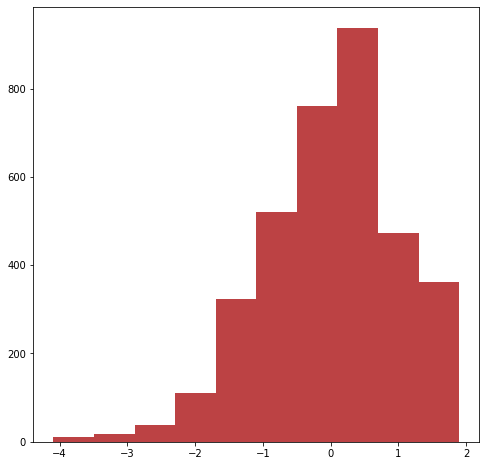

In [174]:
#Graficamos la columna Y
plt.hist(df.y)

(array([   8.,   39.,  112.,  445., 1373.,  969.,  316.,  238.,   46.,
           9.]),
 array([-4.01970619, -3.213915  , -2.40812381, -1.60233262, -0.79654144,
         0.00924975,  0.81504094,  1.62083212,  2.42662331,  3.2324145 ,
         4.03820568]),
 <a list of 10 Patch objects>)

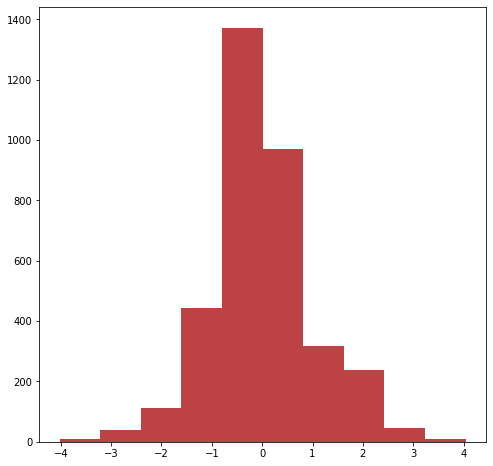

In [175]:
#Graficamos la columna Z
plt.hist(df.z)

Como la columna Y tiene un comportamiento levemente diferente a X y Z procedemos a graficarla en un nuevo histograma, pero solo ilustrando la curva que generan las barras, además, de añadir separar cada barra por actividad. Observamos que la actividad que destaca es Standing, debido a su alta concentración en el valor 0 del eje, reflejando que sus valores varian muy poco entre sí. También, se observa que la actividad Sitting posee una concentración de datos "anticipada", comparada a las otras actividades.


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

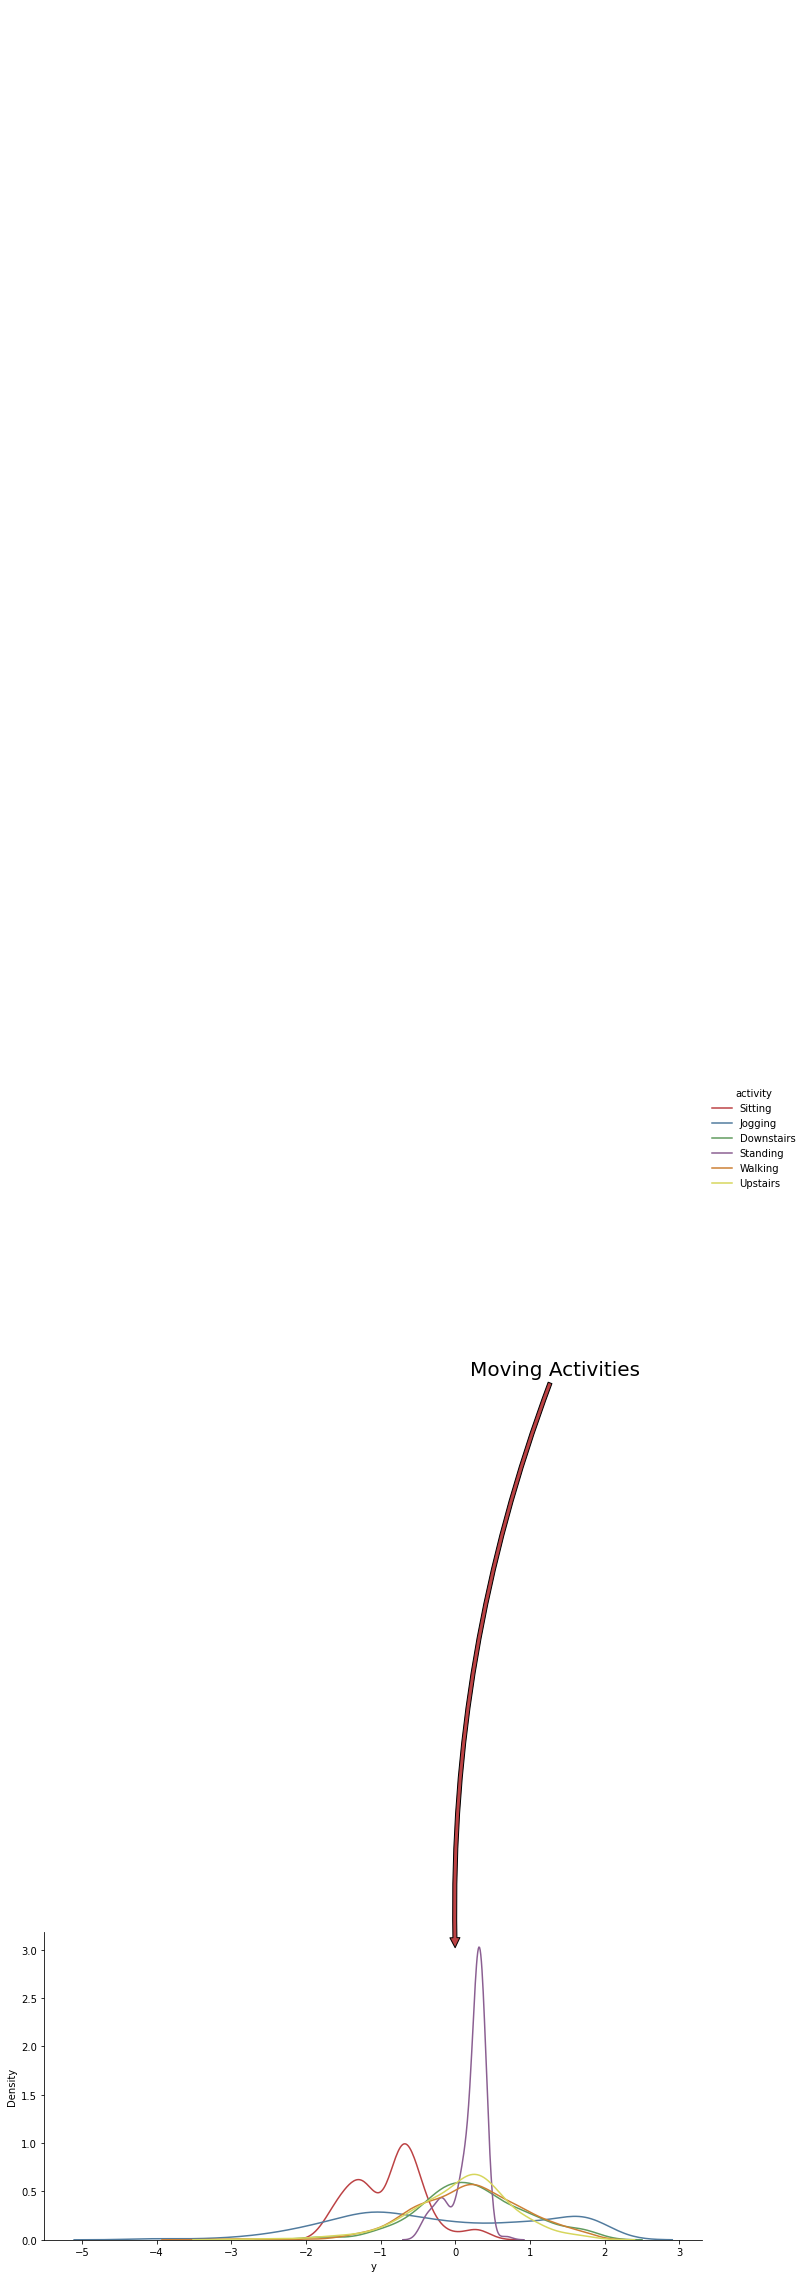

In [176]:
sns.set_palette("Set1", desat=0.60)
facetgrid = sns.FacetGrid(df, hue='activity', size=5,aspect=2)
facetgrid.map(sns.distplot,'y', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Por contexto sabemos que existen actividades que involucran movimiento y otras que no. Veremos que sucede si las clasificamos usando este contexto.

In [177]:
df1 = df[df['activity']=='Jogging']
df2 = df[df['activity']=='Standing']
df3 = df[df['activity']=='Walking']
df4 = df[df['activity']=='Downstairs']
df5 = df[df['activity']=='Sitting']
df6 = df[df['activity']=='Upstairs']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

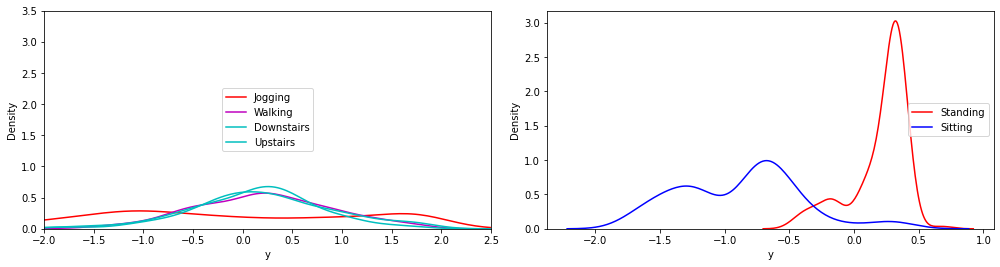

In [178]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(df1['y'],color = 'r',hist = False, label = 'Jogging')
sns.distplot(df3['y'],color = 'm',hist = False,label = 'Walking')
sns.distplot(df4['y'],color = 'c',hist = False, label = 'Downstairs')
sns.distplot(df6['y'],color = 'c',hist = False, label = 'Upstairs')
plt.axis([-2, 2.5, 0, 3.5])
plt.legend(loc='center')

plt.subplot(2,2,2)
sns.distplot(df2['y'],color = 'red',hist = False, label = 'Standing')
sns.distplot(df5['y'],color = 'blue',hist = False,label = 'Sitting')
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

De las gráficas anteriores se desprende que las actividades que involucran movimiento tienen un comportamiento suave con respecto a las actividades estaticas, las cuales son todo lo contrario. Para diferenciar una actividad de otra dentro de un patrón podemos hacer un zoom en el gráfico de las actividades en movimiento entre los valores -0.25 y 0.6. Y para el gráfico de las estaticas un rango de [-1, 0.5].
Por otro lado, notamos que los valores que alcanzan las actividades estaticas son mucho mayores que las de movimiento. Esto último nos proporciona un dato interesante.

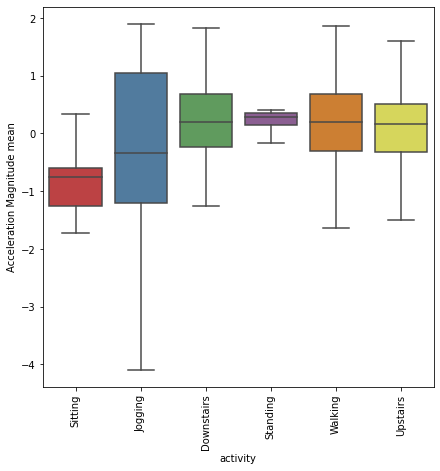

In [179]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

En el diagrama de caja y bigote anterior se observa que las actividades estatica poseen la mediana muy cercana al quartil 3, además, de que las cajas son las más pequeñas (menor distancia entre Q1 y Q3), junto a la cantidad de valores sesgados.

Aplicar t-sne en los datos, donde la columna estudiada seguirá siendo Y.

En la siguientes gráficas se utiliza t-SNE, con perplexity: 2, 5, 10, 20, 50 respectivamente, y el número máximo de iteraciones (1000).

In [180]:


# realiza t-sne con diferentes valores de perplejidad y sus respectivas tramas..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')




performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.002s...
[t-SNE] Computed neighbors for 3555 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.026s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 113.9036713, gradient norm = 0.1156997 (50 iterations in 1.746s)
[t-SNE] Iteration 100: error = 95.8662262, gradient norm = 0.0670258 (50 iterations in 1.131s)
[t-SNE] Iteration 150: error = 89.6510544, gradient norm = 0.0569226 (50 iterations in 1.136s)
[t-SNE] Iteration 200: error = 85.8112411, gradient norm = 0.0439574 (50 iterations in 1.012s)
[t-SNE] Iteration 250: error = 83.0620575, gradient norm = 0.0452026 (50 iterations in 1.003s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.062057
[t-SNE] Iteration 300: error = 2.8218522, gradient norm = 0.0034564 (50 iterations in 1.013s)
[t-SNE] Iteration 350: error = 2.1658540, gradient norm = 0.0013511 (50 iterations in 1.050s)
[t-SNE] Iteration 400: error = 1.8248309, gradient norm = 0.0009607 (50 iterations in 1.070s)
[t-SNE] Iteration 450: error = 1.6137114, gradient norm = 0.0007682 (50 iterations in 1.048s)
[t-SNE] Iteration 500: error = 1.4663769, gradient norm = 0.0006306 (50

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


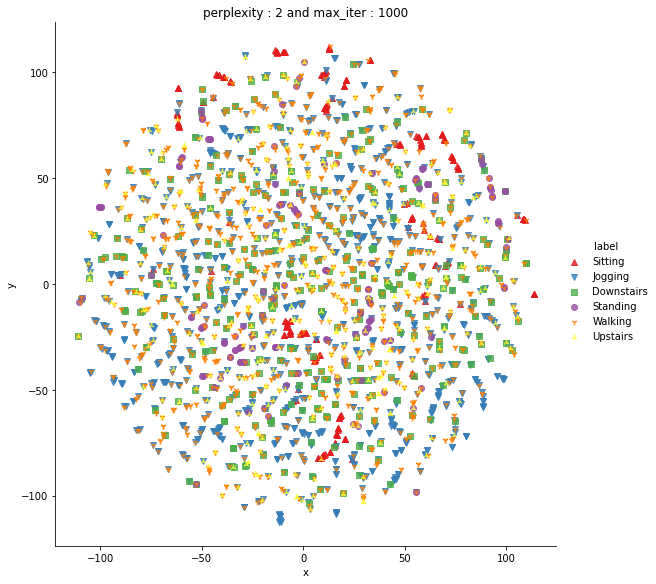

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.002s...
[t-SNE] Computed neighbors for 3555 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.053s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 101.0569611, gradient norm = 0.0856026 (50 iterations in 1.705s)
[t-SNE] Iteration 100: error = 84.8856201, gradient norm = 0.0372472 (50 iterations in 1.148s)
[t-SNE] Iteration 150: error = 79.6261749, gradient norm = 0.0272845 (50 iterations in 1.001s)
[t-SNE] Iteration 200: error = 76.4331894, gradient norm = 0.0295784 (50 iterations in 0.986s)
[t-SNE] Iteration 250: error = 74.2148285, gradient norm = 0.0190609 (50 iterations in 0.974s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.214828
[t-SNE] Iteration 300: error = 2.1984296, gradient norm = 0.0014761 (50 iterations in 0.972s)
[t-SNE] Iteration 350: error = 1.5219829, gradient norm = 0.0007807 (50 iterations in 1.004s)
[t-SNE] Iteration 400: error = 1.2507720, gradient norm = 0.0005510 (50 iterations in 1.016s)
[t-SNE] Iteration 450: error = 1.0973287, gradient norm = 0.0004153 (50 iterations in 0.990s)
[t-SNE] Iteration 500: error = 0.9969503, gradient norm = 0.0003352 (50

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


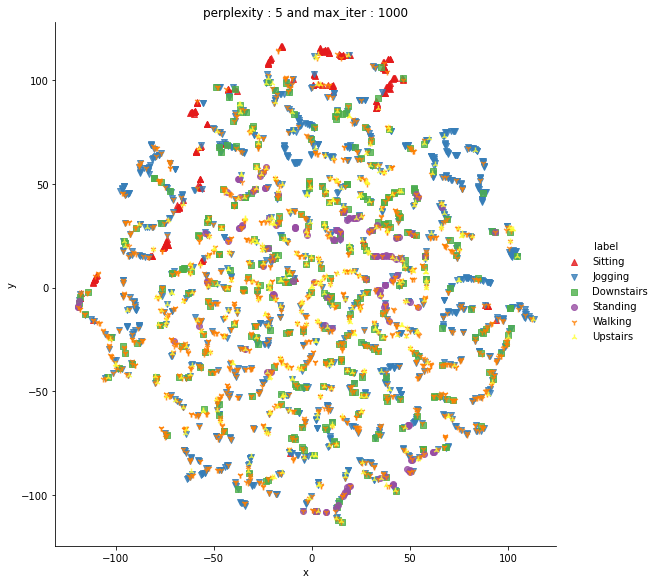

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.003s...
[t-SNE] Computed neighbors for 3555 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.080s


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 50: error = 90.4373474, gradient norm = 0.0618259 (50 iterations in 1.497s)
[t-SNE] Iteration 100: error = 77.5161362, gradient norm = 0.0207280 (50 iterations in 1.059s)
[t-SNE] Iteration 150: error = 73.7252045, gradient norm = 0.0142385 (50 iterations in 1.053s)
[t-SNE] Iteration 200: error = 71.5225220, gradient norm = 0.0126711 (50 iterations in 1.080s)
[t-SNE] Iteration 250: error = 69.9787369, gradient norm = 0.0116449 (50 iterations in 1.048s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.978737
[t-SNE] Iteration 300: error = 1.7912326, gradient norm = 0.0013497 (50 iterations in 1.052s)
[t-SNE] Iteration 350: error = 1.2130152, gradient norm = 0.0005652 (50 iterations in 1.025s)
[t-SNE] Iteration 400: error = 0.9883184, gradient norm = 0.0003545 (50 iterations in 1.044s)
[t-SNE] Iteration 450: error = 0.8782037, gradient norm = 0.0002531 (50 iterations in 1.037s)
[t-SNE] Iteration 500: error = 0.8136826, gradient norm = 0.0002016 (50 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


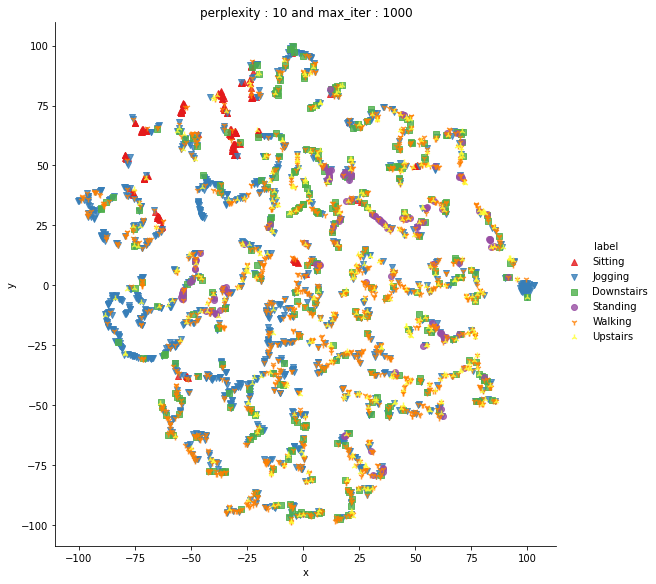

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.003s...
[t-SNE] Computed neighbors for 3555 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.166s
[t-SNE] Iteration 50: error = 81.1947784, gradient norm = 0.0479181 (50 iterations in 1.698s)
[t-SNE] Iteration 100: error = 70.1193161, gradient norm = 0.0120493 (50 iterations in 1.155s)
[t-SNE] Iteration 150: error = 67.9190063, gradient norm = 0.0063225 (50 iterations in 1.140s)
[t-SNE] Iteration 200: error = 67.1000748, gradient norm = 0.0037834 (50 iterations in 1.127s)
[t-SNE] Iteration 250: error = 66.6431961, gradient norm = 0.0029432 (50 iterations in 1.121s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.643196
[t-SNE] Iteration 300: error = 1.4253449, gradient norm = 0.0012103 (50 iterations in 1.163s)
[t-SNE] Iteration 350: error = 1.0004963, gradient norm = 0.0004690 (50 iterations in 1.123s)
[t-SNE] Iteration 400: error = 0.8466758, gradient norm = 0.0002642 (50 iterations in 1.172s)
[t-SNE] Iteration 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


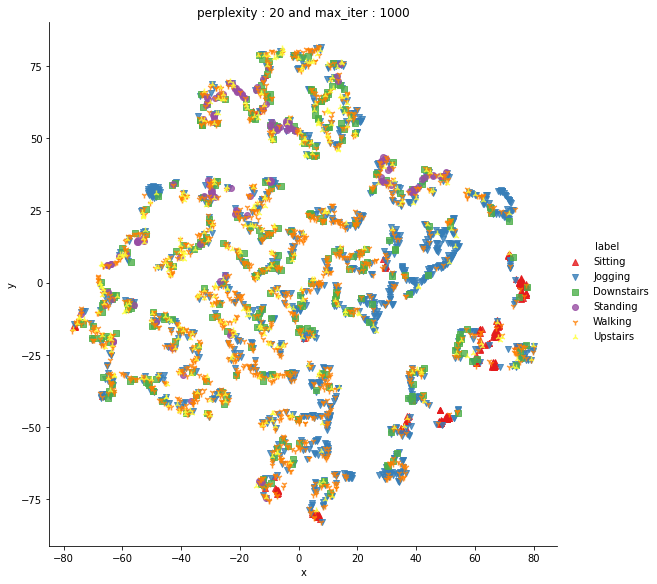

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3555 samples in 0.003s...
[t-SNE] Computed neighbors for 3555 samples in 0.117s...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 3555
[t-SNE] Computed conditional probabilities for sample 2000 / 3555
[t-SNE] Computed conditional probabilities for sample 3000 / 3555
[t-SNE] Computed conditional probabilities for sample 3555 / 3555
[t-SNE] Mean sigma: 0.107762
[t-SNE] Computed conditional probabilities in 0.329s
[t-SNE] Iteration 50: error = 72.1868286, gradient norm = 0.0452168 (50 iterations in 2.071s)
[t-SNE] Iteration 100: error = 64.5696411, gradient norm = 0.0070204 (50 iterations in 1.474s)
[t-SNE] Iteration 150: error = 63.5561829, gradient norm = 0.0073446 (50 iterations in 1.459s)
[t-SNE] Iteration 200: error = 63.1895714, gradient norm = 0.0006417 (50 iterations in 1.416s)
[t-SNE] Iteration 250: error = 63.1529274, gradient norm = 0.0001234 (50 iterations in 1.391s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.152927
[t-SNE] Iteration 300: error = 0.9904361, gradient norm = 0.0009353 (50 iterations in 1.442s)
[t-SNE] 

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


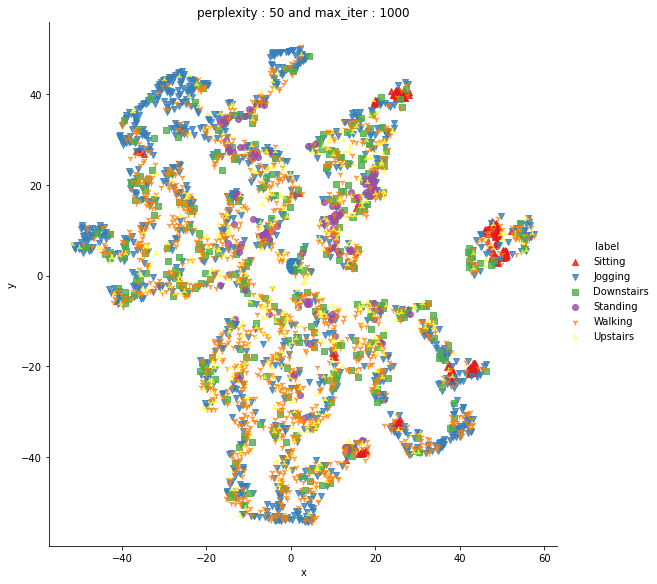

Done


In [181]:
X_pre_tsne = df.drop(['y', 'activity'], axis=1)
y_pre_tsne = df['activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

En la última gráfica resultante, se observa que se forman pequeños grupos de puntos de una misma actividad (no es tan evidente debido a que los puntos verdes se sobreponen a los otros). Lo curioso, es que los puntos de Jogging (verde) estan principalmente en los extremos de la nube de puntos, probablemente debido a sus valores sesgados. Por último, en el centro se concentran varias subnubes de puntos de la actividad Standing (amarillo), reflejando la reducida cantidad de sesgos.